## Cosmology

[ 0.08792409  0.61313869  0.96350365  5.25547445 15.76642336 24.        ] h


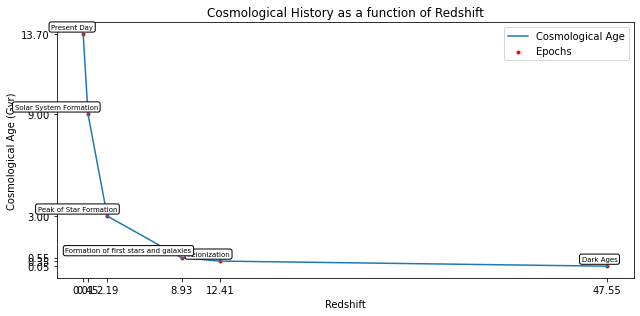

In [71]:
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18, z_at_value
import astropy.units as u
import numpy as np

# Questions 3 and 4

cosmo = Planck18

# Defines the ages array
ages = np.array([0.05019,0.35,0.55,3,9,13.7])*u.Gyr
# Defines the labels array, each label correspond to an age value
labels = np.array(["Dark Ages","Reionization","Formation of first stars and galaxies",
                   "Peak of Star Formation","Solar System Formation","Present Day"])

# Compress age array to a 24 hour period (q3)
# First, calculate percentage of each point in ages array
ages_perc = ages.value/ages[-1].value

# Now multiplies the percentage array to 24 to get the ages in a 24 hour period
ages_day = (ages_perc*24)*u.hour
print(ages_day)

# Uses z_at_value to find a corresponding redshift value in our ages array
z_vals = [z_at_value(cosmo.age, age, zmax = 10e6) for age in ages]

# Create figure and plot
fig = plt.figure(figsize=(9, 4.5))
ax = fig.add_subplot(111)
ax.plot(z_vals, ages.value, label='Cosmological Age')
ax.scatter(z_vals, ages.value, c='red', marker='.', label='Epochs')

# Set labels and title
ax.set_xticks(z_vals)
ax.set_yticks(ages.value)
ax.set_xlabel("Redshift")
ax.set_ylabel("Cosmological Age (Gyr)")
ax.set_title("Cosmological History as a function of Redshift")

# Place notations
for i, txt in enumerate(labels):
    ax.annotate(txt, 
                (z_vals[i], ages[i].value), 
                textcoords="offset points", 
                xytext=(10,5),  # Offset the labels to avoid overlap
                ha='right', 
                fontsize=7, 
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Add legend
ax.legend()

# Save the figure as a PDF
plt.tight_layout()
plt.savefig("cosmological_history.pdf")

# Show the plot
plt.show()

# 21 Line

In [54]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import WMAP9 as cosmo

# Coding the functions representing the equations (q6, 7, 8, 9)

# Set parameters
A_coeff = 2.869e-15 * u.s
degen = 3

def emission_line(freq, n_upper):
    """Defines the line emission coefficient function
    Parameters:
    freq-----float like, 21cm frequency
    n_upper-------float like, number density in the upper energy level
    Output:
    emission_coeff-----float like, line emission"""
    
    # Defines and returns the line emission coefficient
    return (const.h*freq/(4*np.pi))*n_upper*A_coeff
    
    
def absorption_line(freq, n_lower):
    """Defines the line absorption coefficient function
    Parameters:
    freq-----float like, 21cm frequency
    n_lower-------float like, number density in the lower energy level
    Output:
    emission_coeff-----float like, line emission"""
    
    # Defines and returns the line absorption coefficient
    return (1/(8*np.pi))(const.c/freq)**2*(degen)*n_lower*A_coeff

def LRT(I, path, abs_cont, abs_line, e_cont, e_line, line_den, n_upper, n_lower):
    """Defines the Line Radiative Transfer equation
    Parameters:
    I------array like, covariant specific intensity
    abs_cont------array like, continuum absorption coefficient
    abs_line------array like, line absorption coefficient
    e_cont------array like, continuum emission coefficient
    e_line------array like, line emission coefficient
    line_den-------array like, line density profile
    n_upper------array like, number density in the upper energy level
    n_lower------array like, number density in the lower energy level
    Output:
    dIdz_line------array like, differential equation
    """
    
    # Defines and returns the differential equation
    return -(abs_cont+(abs_line*line_den)*(1-(n_upper/n_lower)*(degen)**-1))*I+(e_cont+e_line*line_den)

def CRT(I, path, abs_cont, e_cont):
    """Defines the Continuum Radiative Transfer of the CMB background
    Parameters:
    I------array like, covariant specific intensity
    abs_cont------array like, continuum absorption coefficient
    e_cont------array like, continuum emission coefficient
    Output:
    dIdz_cont-------array like, differential equation"""
    
    # Defines and returns the differential equation
    return -abs_cont*I+e_cont

def delta_T(I_line, I_cont, freq):
    """Defines the differential brightness temperature
    Parameters:
    I_line------array like, line specific intensity
    I_count------array like, continuum specific intensity
    freq-----array like, frequency
    Output:
    delta_T-------array like, differential brightness temperature
    """
    # Defines and returns the differential brightness equation
    return (I_line - I_cont)*((const.c/freq)**2)/(const.k_B)

# Test (Bonus 1)

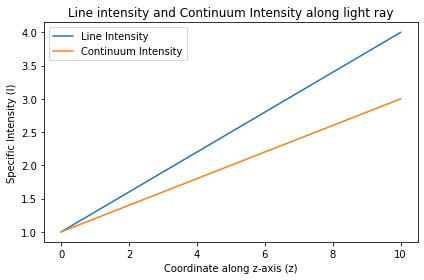

In [81]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Bonus 1
# Test1: no absorption or emission coeff -> dIdz = 0
# Test2: no absorption coeff -> dIdz = dsdz

freq = 1420*10e6* u.Hz

# Define parameters with units in CGS
I0 = 1.0 * u.erg / (u.s * u.cm**2 * u.Hz * u.sr)  # Initial specific intensity
k_cont = 0.0 / u.cm  # Continuum absorption coefficient
k_line = 0.0 / u.cm  # Line absorption coefficient
e_cont = 0.2 / u.cm  # Continuum emission coefficient
e_line = 0.1 / u.cm  # Line emission coefficient
line_den = 1.0 * u.dimensionless_unscaled  # Line density profile
n_upper = 1.5 / u.cm**3  # Number density in the upper energy level
n_lower = 0.5 / u.cm**3  # Number density in the lower energy level

# Define the range of z (coordinates along the z-axis)
z_range = np.linspace(0, 10, 1000)

# Solve the ODE using scipy.integrate.odeint
I_line = odeint(LRT, I0, z_range, args=(k_cont, k_line, e_cont, e_line, line_den, n_upper, n_lower))
I_cont = odeint(CRT, I0, z_range, args=(k_cont, e_cont))
diff_T = delta_T(I_line, I_cont, freq)

# Plot the comparison between line intensity and continuum intensity
plt.plot(z_range, I_line, label = 'Line Intensity') # Line intensity, blue line
plt.plot(z_range, I_cont, label = 'Continuum Intensity') # Continuum intensity, orange line
plt.xlabel('Coordinate along z-axis (z)')
plt.ylabel('Specific Intensity (I)')
plt.title('Line intensity and Continuum Intensity along light ray')

plt.legend()

# Save the figure as a PDF
plt.tight_layout()
plt.savefig("LRT_and_CRT_test.pdf")

# Show the plot
plt.show()


K m2 / (Hz2 J s2)


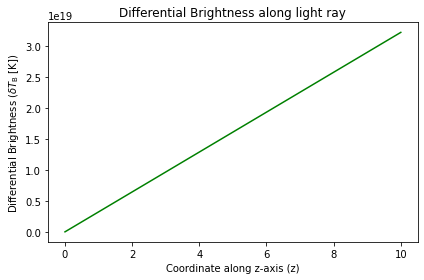

In [80]:
# Bonus 1
# Plots the differential brightness
print(diff_T.unit)
plt.plot(z_range, diff_T, c = 'green')
plt.xlabel("Coordinate along z-axis (z)")
plt.ylabel(r"Differential Brightness ($\delta {T_{\rm B}}$ [K])")
plt.title("Differential Brightness along light ray")

# Save the figure as a PDF
plt.tight_layout()
plt.savefig("diff_bright_test.pdf")

# Show the plot
plt.show()


# Bonus 2

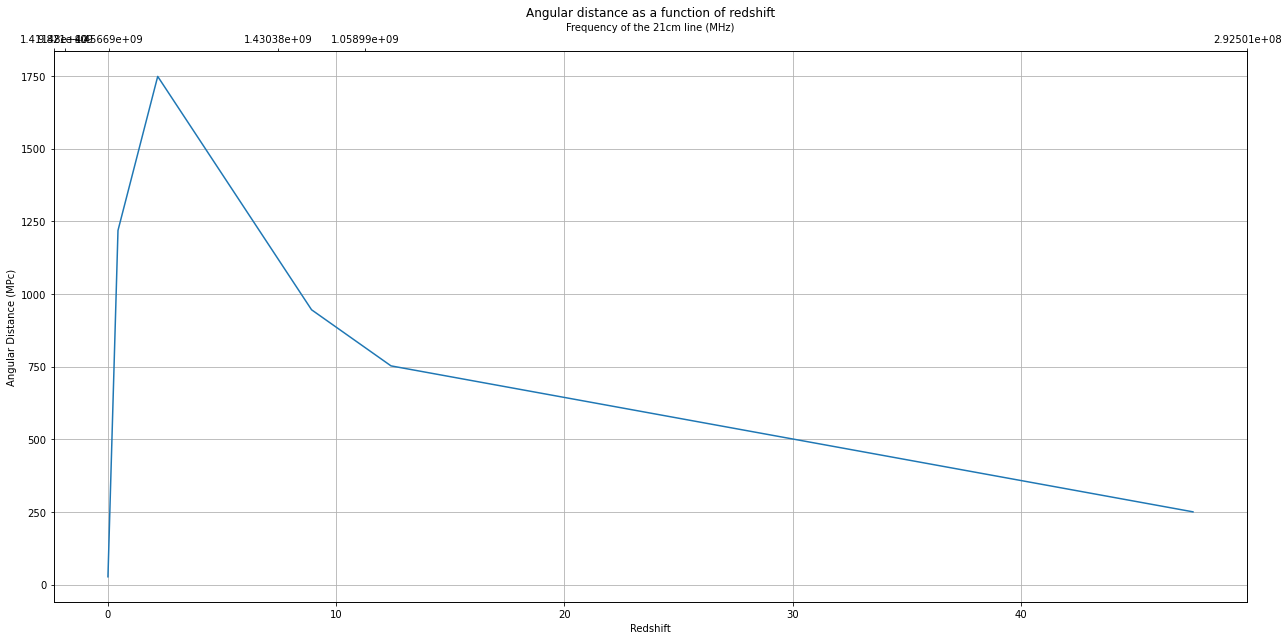

In [84]:
# Bonus 2
# Obtains angular distance using Planck 18
dist = cosmo.angular_diameter_distance(z_vals)

# Calculates frequency at each redshift value
freq = 1420*10e6* u.Hz/(z_vals + np.ones_like(z_vals))

# Creates second figure for plotting
fig2 = plt.figure(figsize=(18,9))
ax = fig2.add_subplot(111)
ax.plot(z_vals, dist.value)
ax.set_title("Angular distance as a function of redshift")
ax.set_xlabel("Redshift")
ax.set_ylabel("Angular Distance (MPc)")
plt.grid(True)
ax2 = ax.twiny()
ax2.set_xticks(z_vals)
ax2.set_xlabel("Frequency of the 21cm line (MHz)")
ax2.set_xticklabels(['{:g}'.format(freq) for freq in freq.value])

# Save the figure as a PDF
plt.tight_layout()
plt.savefig("ang_dist.pdf")

# Show the plot
plt.show()
